In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd
from pydataset import data

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.cluster import KMeans


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate
from sklearn.tree import export_graphviz

# Custom Module's
from wrangle import wrangle_zillow
import functions

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")

In [3]:
train, validate, test = wrangle_zillow('intial_explore', 1.5)

In [4]:
df = train

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29182 entries, 47145 to 43370
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bath          29182 non-null  float64
 1   bed           29182 non-null  float64
 2   area          29182 non-null  float64
 3   lat           29182 non-null  float64
 4   long          29182 non-null  float64
 5   lot_size      29182 non-null  float64
 6   year          29182 non-null  float64
 7   tax_value     29182 non-null  float64
 8   tax_amount    29182 non-null  float64
 9   logerror      29182 non-null  float64
 10  heating_type  29182 non-null  object 
 11  county        29182 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.9+ MB


In [6]:
# # using fips before I drop fips
# df["county"] = df["fips"].map({6037: "Los Angeles", 6059: "Orange", 6111: "Ventura"})

In [7]:
len(df)

29182

In [8]:
df[df.duplicated()]

,bath,bed,area,lat,long,lot_size,year,tax_value,tax_amount,logerror,heating_type,county


In [9]:
len(df)

29182

In [10]:
# columns that I personally felt have no value 
cols_to_remove = ['propertylandusetypeid', 'heatingorsystemtypeid', 'parcelid', 'buildingqualitytypeid',\
                  'finishedsquarefeet12', 'fullbathcnt', 'propertylandusedesc', 'id.1', 'assessmentyear',\
                  'structuretaxvaluedollarcnt', 'roomcnt', 'regionidcity', 'regionidcounty', 'regionidzip',\
                  'propertycountylandusecode', 'censustractandblock', 'landtaxvaluedollarcnt',\
                  'rawcensustractandblock', 'propertyzoningdesc', 'transactiondate', 'calculatedbathnbr', 'id','fips']

In [11]:
df = functions.remove_columns(df, cols_to_remove)

KeyError: "['propertylandusetypeid' 'heatingorsystemtypeid' 'parcelid'\n 'buildingqualitytypeid' 'finishedsquarefeet12' 'fullbathcnt'\n 'propertylandusedesc' 'id.1' 'assessmentyear'\n 'structuretaxvaluedollarcnt' 'roomcnt' 'regionidcity' 'regionidcounty'\n 'regionidzip' 'propertycountylandusecode' 'censustractandblock'\n 'landtaxvaluedollarcnt' 'rawcensustractandblock' 'propertyzoningdesc'\n 'transactiondate' 'calculatedbathnbr' 'id' 'fips'] not found in axis"

In [ ]:
# removed any properties claiming to be more than 1
selRows = df[df.unitcnt == 2.0].index
df = df.drop(selRows, axis=0)

In [ ]:
# Removing some outliers in heaters 
selRows = df[(df.heatingorsystemdesc == 'Yes') | (df.heatingorsystemdesc == 'Gravity') |\
(df.heatingorsystemdesc == 'Radiant') | (df.heatingorsystemdesc == 'Baseboard')|\
(df.heatingorsystemdesc == 'None')| (df.heatingorsystemdesc == 'Solar')].index
df = df.drop(selRows, axis=0)

In [ ]:
df = functions.remove_columns(df, ['unitcnt'])

In [ ]:
df.info()

In [ ]:
df = df.rename(columns = {
    'bedroomcnt':'bedrooms', 
    'bathroomcnt':'bathrooms', 
    'calculatedfinishedsquarefeet':'area',
    'taxvaluedollarcnt':'tax_value',
    'latitude':'lat',
    'longitude':'long',
    'lotsizesquarefeet':'lot_size'
    'yearbuilt':'year',
    'taxamount':'tax_amount',
    'heatingorsystemdesc':'heating_type',

})

In [ ]:
df.area.describe()

In [ ]:
df.lotsizesquarefeet.describe()

In [ ]:
outlier_col_list=[
'bathroomcnt',
'bedroomcnt',
'calculatedfinishedsquarefeet',
'lotsizesquarefeet',
'yearbuilt',
'taxamount',
'taxvaluedollarcnt']

In [ ]:
outlier_col_list

In [ ]:
train.bathroomcnt.value_counts()

In [ ]:
train.bathroomcnt.hist()

In [16]:
train, validate, test = wrangle_zillow('explore', 2.5)

<AxesSubplot:>

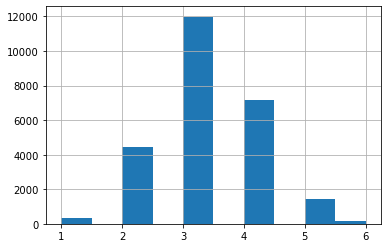

In [17]:
train.bed.hist()